In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
from sklearn.datasets import load_iris


iris_data = load_iris()

In [4]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris_data.data.shape

(150, 4)

In [6]:
len(iris_data.feature_names)

4

In [7]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
y = iris_data.target[iris_data.target != 2]

In [9]:
X = iris_data.data[iris_data.target != 2][:, :2]

In [10]:
X.shape

(100, 2)

In [11]:
X = np.append(X, np.ones((100,1)), 1)

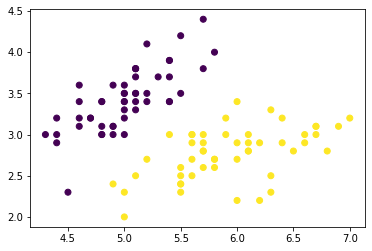

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [13]:
w = np.random.uniform(0, 1, (3, ))

In [14]:
lr = 1e-2

In [15]:
alpha = 0.1

In [18]:
y4_train = np.where(y == 0, -1, 1)

In [21]:
for i in range(1000):
    w = w - lr * (alpha * w - np.matmul(X.T, (y4_train * ((y4_train * np.matmul(X, w)) < 1).astype('int'))))

In [30]:
w0 = -w[0]/w[1]
b = -w[2]/w[1]

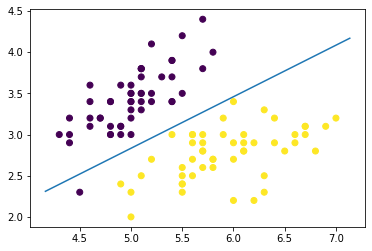

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=y)
xx = np.linspace(*plt.xlim())
plt.plot(xx, w0*xx+b)

In [32]:
from sklearn import svm

In [33]:
skl_model = svm.SVC(kernel='linear', C=alpha)

In [34]:
skl_model.fit(X[:, :2], y)

SVC(C=0.1, kernel='linear')